In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import root_mean_squared_error

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [2]:
data = pd.read_csv("data_encoded.csv")

In [3]:
data

,Age,Adopted,BIRD,CAT,DOG,OTHER,BEIGE,BLACK,BLUE,BRINDLE-BN,...,MILPITAS,MONTE SERENO,MORGAN HILL,MOUNTAIN VIEW,OUT OF COUNTY,PALO ALTO,SAN JOSE,SANTA CLARA,SARATOGA,SUNNYVALE
0,5475.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,6570.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,6570.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,5840.0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,6205.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12068,35.0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
12069,1095.0,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
12070,150.0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
12071,150.0,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [4]:
y = data.Adopted

In [5]:
x = data.drop(columns=["Adopted"])

In [8]:
x_train, x_test, y_train, y_test= train_test_split(x, y, shuffle=True, test_size=.2)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [24]:
KNN = KNeighborsClassifier(n_neighbors=20)
KNN.fit(x_train, y_train)
KNN_pred = KNN.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

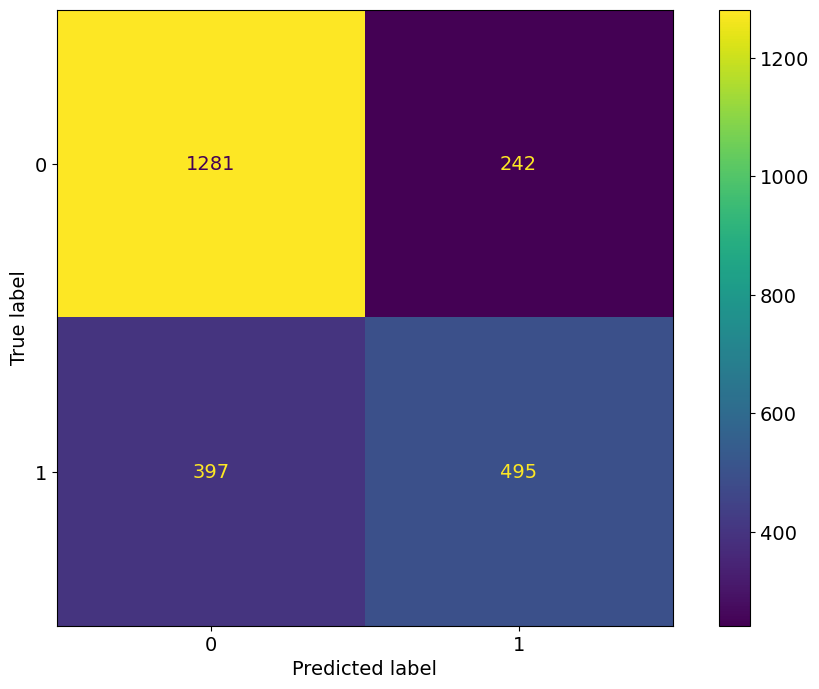

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, KNN_pred))
disp.plot()

K needs to be 8, with obtained minimum error 0.26335403726708073


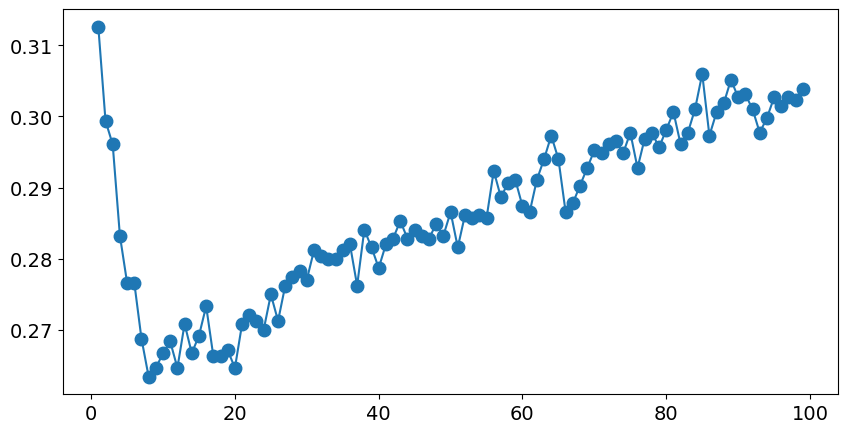

In [27]:
error_rate=[]

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,100),error_rate,marker='o',markersize=9)
print("K needs to be {}, with obtained minimum error {}".format(error_rate.index(min(error_rate))+1,min(error_rate)))

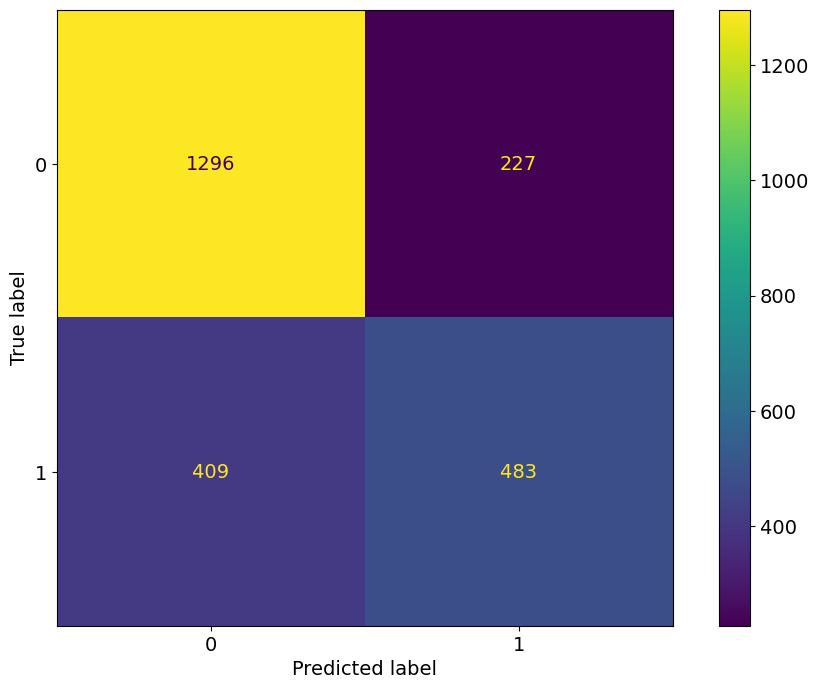

In [28]:
KNN = KNeighborsClassifier(n_neighbors=8)
KNN.fit(x_train, y_train)
KNN_pred = KNN.predict(x_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, KNN_pred))
disp.plot()

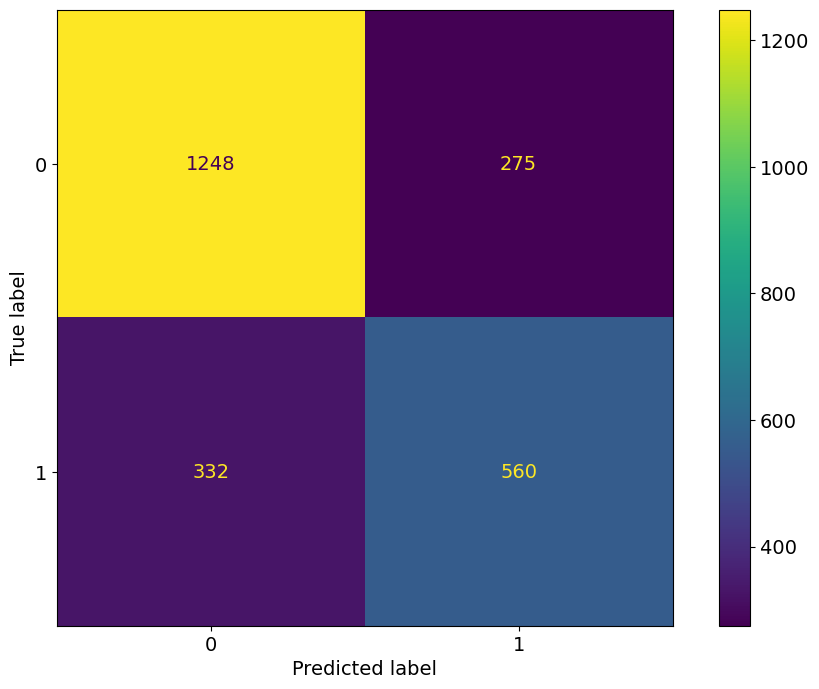

In [30]:
RF = RandomForestClassifier(n_estimators=200)
RF.fit(x_train, y_train)
RF_pred = RF.predict(x_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, RF_pred))
disp.plot()

K needs to be 12, with obtained minimum error 0.2484472049689441


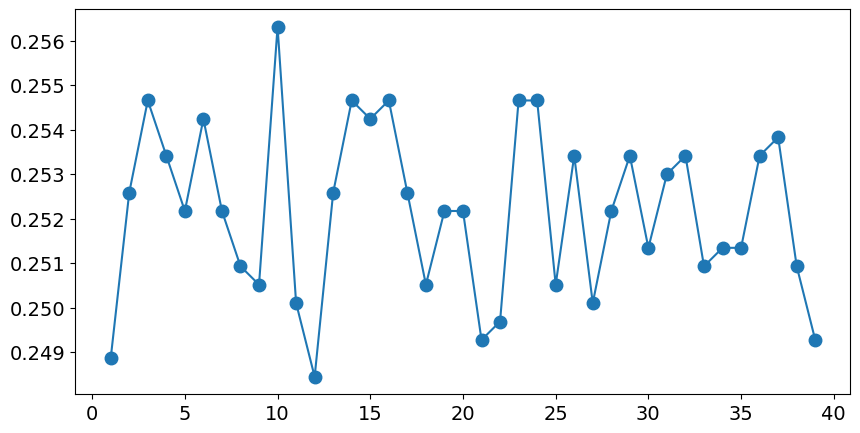

In [35]:
error_rate=[]

for i in range(25,1000,25):
    RF = RandomForestClassifier(n_estimators=i)
    RF.fit(x_train, y_train)
    pred=RF.predict(x_test)
    error_rate.append(np.mean(pred != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,marker='o',markersize=9)
print("K needs to be {}, with obtained minimum error {}".format(error_rate.index(min(error_rate))+1,min(error_rate)))

In [36]:
25 + 25*12

325

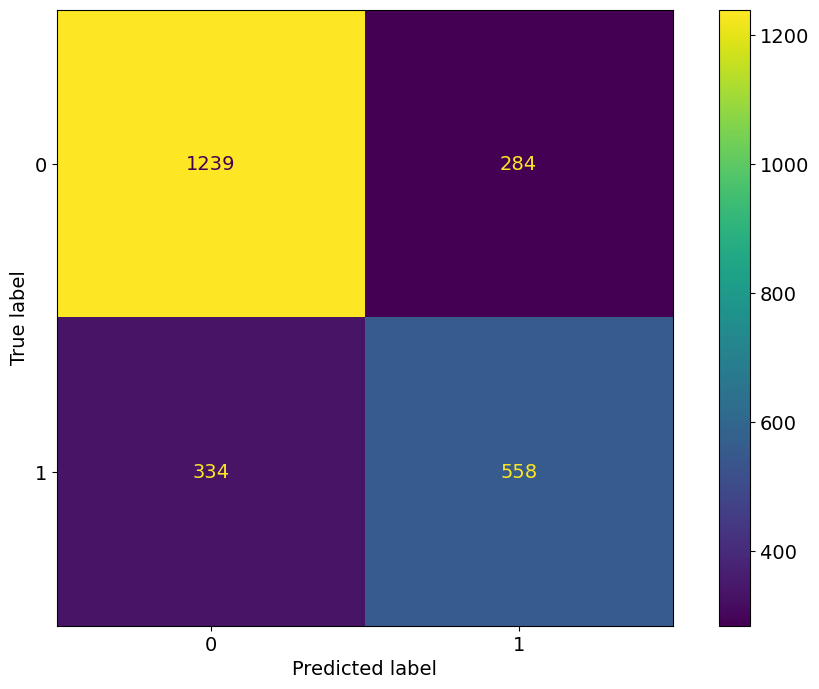

In [37]:
RF = RandomForestClassifier(n_estimators=325)
RF.fit(x_train, y_train)
RF_pred = RF.predict(x_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, RF_pred))
disp.plot()

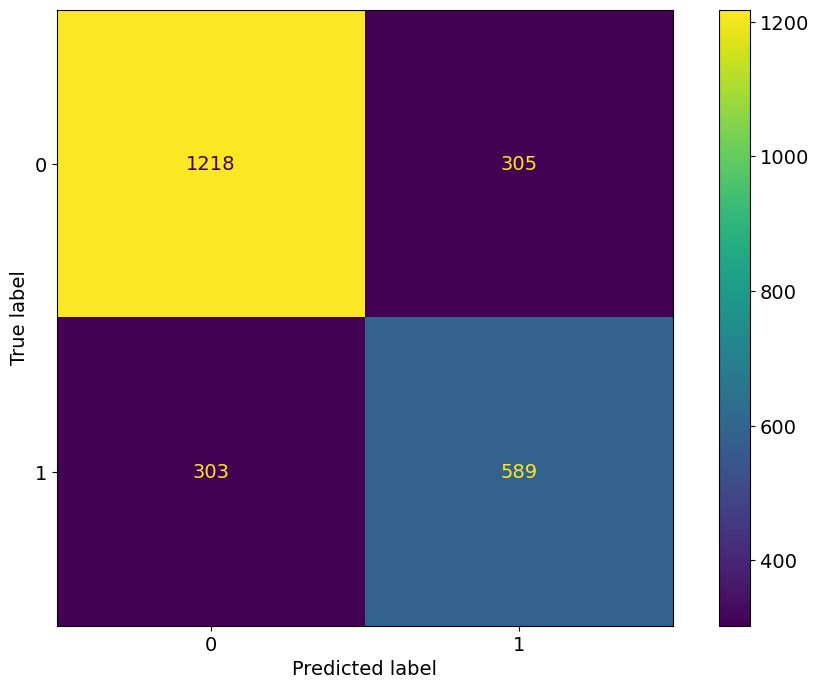

In [45]:
SVM = SVC(C=10, gamma=0.1)
SVM.fit(x_train, y_train)
svm_pred = SVM.predict(x_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, svm_pred))
disp.plot()

In [46]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(x_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=  27.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=  27.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=  27.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=  27.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=  27.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.693 total time=  24.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.695 total time=  24.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=  24.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.703 total time=  24.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.695 total time=  23.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.633 total time=  22.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [47]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


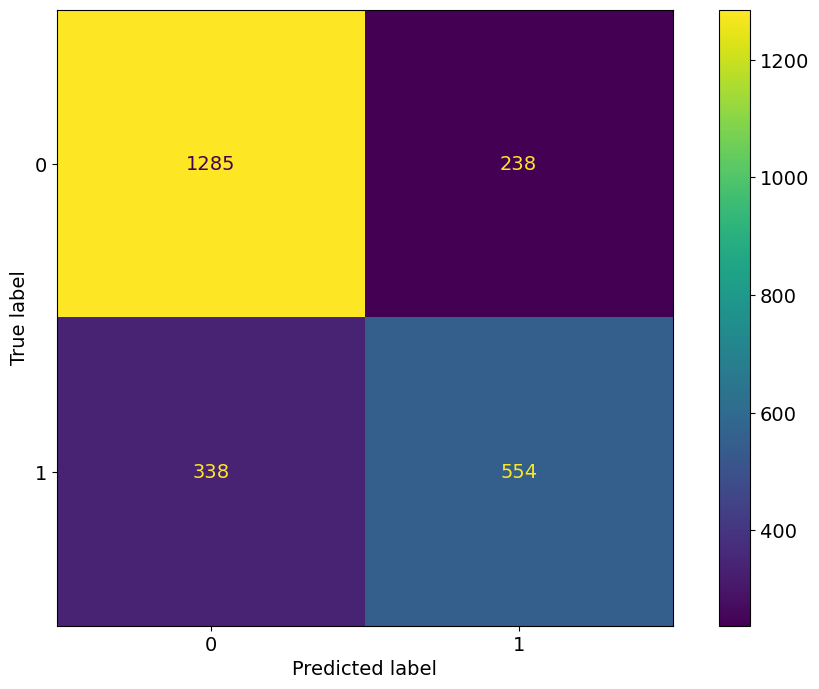

In [48]:
SVM = SVC(C=1, gamma=0.1)
SVM.fit(x_train, y_train)
svm_pred = SVM.predict(x_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, svm_pred))
disp.plot()

In [75]:
#.76 accuracy